<a href="https://colab.research.google.com/github/Ruchir555/State-Transfer-between-CV-Bosonic-Modes-and-Qubits/blob/main/T_parameter_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program finds the $t$-parameters between an arbitrary numerical sequence of vectors following the majorization condition. This is done in the function t_parameters(x, y). Firstly, it sorts the vectors $x$ & $y$ into descending order, after which it checks whether or not the vectors actually obey the majorization relation ($x \prec y$), and if they are the same length. Then, it finds the k index such that $y_k \leq x_1 \leq y_{k-1}$, such that we can write the respective t-parameter as:

$$
t = \frac{x_1-y_k}{y_1-y_k}
$$

This process is repeated with all the reduced vectors (obtained by removing the first element of the vector and transforming the $k$-th element of y as $(t\cdot y_k + (1-t)\cdot y_1)$), such that ($d-1$) $t$-parameters are found for vectors of length $d$. 

This program has several helper functions (sum_arr_till_index(arr, idx), isMajorized(x,y), bubbleSort(arr), find_k_idx(x,y)) which are fairly straightforward, but explained below nevertheless. 

In [2]:
def bubbleSort(arr):  #Sort in descending order, O(n^2)
    n = len(arr)
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] < arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#Test code:
x = [5, 3, 2, 9, 10, 19, 110]
print(bubbleSort(x))

[110, 19, 10, 9, 5, 3, 2]


In [3]:
def sum_arr_till_index(arr, idx): #sum an array from index 0 to idx
  sum = 0
  for i in range(0,idx):
    sum += arr[i]
  return sum


def isMajorized(x,y): #check if x is majorized by y
  if (len(x)!= len(y)):
    return False

  isTrue = 1  #1 == True, 0 == False
  x = bubbleSort(x)
  y = bubbleSort(y)

  for k in range(0,len(x)+1):
    if (sum_arr_till_index(x,k) <= sum_arr_till_index(y,k)):  #Majorization def'n
      isTrue*=1
    else:
      isTrue *= 0
  return isTrue==1  #returns 0 if false (does not y majorize x), 1 if true (y majorizes x)


# Test Code:
A = [2, 3, 5, 3, 2]
B = [3, 1, 6, 2, 3]
print(isMajorized(A,B))
# isMajorized(B,A)
sum_arr_till_index(A,len(A))

True


15

In [4]:
def find_k_idx(x,y, reOrder = False): #Find the k-index such that y_k <= x_1 <= y_{k-1}.
  if (reOrder == True):   #don't automatically sort
    x = bubbleSort(x)
    y = bubbleSort(y)

  else:
    x1 = x[0]

    for k in range(1, len(y)):
      if (y[k] <= x1 <= y[k-1]):
        return k

# Test Code:
xx = [100, 50, 25, 25, 0]
yy = [125, 25, 25, 25, 0]
# find_k_idx(xx,yy)
X = [5, 10, 15, 20]
Y = [7, 8, 1, 34]
# find_k_idx(X,Y)
X, Y = bubbleSort(X[1:]), bubbleSort(Y[1:])
print(find_k_idx(X,Y))
yY = [15,10,5]
xX = [8,7,1]
print(find_k_idx(xX[1:], yY[1:]))

1
1


In [5]:
def t_parameters(x, y, checkMajorization = False, checkLength = True): # x majorized by y; finds t-parameters such that x = Dy, D = T_r...T_2 T_1
  # First sort vectors into descending order
  x_copy =  bubbleSort(x) 
  y_copy = bubbleSort(y)
  t_parameters_list = []
  index_choice_list = []  #which index is chosen at each reduced vector step

  if (checkLength ==True):
    if (len(x)!= len(y)):
      print("Unequal lengths \n")
      return False  #or break?
  if (checkMajorization==True):
    if (isMajorized(x,y)==False):
      print("Not majorized \n")
      return t_parameters_list, index_choice_list  #or break?

  # y_n <= x_1 <= y_1 and y_k <= x_1 <= y_{k-1}
  # Therefore x_1 = t*y_1 + (1-t)*y_k
  # Therefore t = (x_1-y_k)/(y_1-y_k)
  i=0
  k=0
  t=0
  while i < len(x)-1: #iterate appropriate amount of times (1 less than dimension of x,y)
    print('x', x_copy)
    print('y', y_copy)
    k = find_k_idx(x_copy, y_copy)  #Find appropriate k index
    print('k', k+1)
    index_choice_list.append(k+1) #append index choice; k+1 because Python starts from 0
    t = (x_copy[0]-y_copy[k])/(y_copy[0]-y_copy[k]) #Write down t
    t_parameters_list.append(t)  #Append t to list
    y_copy[k] = t*y_copy[k] + (1-t)*y_copy[0] #Change k-th index entry according to T-transform
    y_copy = y_copy[1:] # Pop the first index to get reduced vector
    x_copy = x_copy[1:] # Pop the first index to get reduced vector
    i+=1

    if (t>1 or t<0):  #out of bounds t condition
      print("Incorrect t obtained \n")
      return False  #or break?

  return t_parameters_list, index_choice_list


# Test Code:
X = [5, 10, 15, 20]
Y = [7, 8, 1, 34]
tparams1, indices1 = t_parameters(X,Y)
print('Example 1:', tparams1, '\n')  #[0.46153846153846156, 0.5333333333333333, 0.6923076923076923] 

Xx = [1/2, 2/5, 1/10]
Yy = [3/5, 1/5, 1/5]
tparams2, indices2 = t_parameters(Xx,Yy, checkMajorization=True)
print('Example 2:', tparams2, '\n')  #Nielsen example, not majorized

a = [5, 3, 2]
b = [6, 3, 1]
tparams3, indices3 = t_parameters(a,b)
print('Example 3:', tparams3, '\n')  #[0.6666666666666666, 0.6666666666666666] 

# 5D pseudo-TMS->Bell state case:
lamb = .75  #lambda = tanh(r), in this case lamb>=0.72 for majorization condition
N = 1 + lamb**2 + lamb**4 + lamb**6 + lamb**8 #normalization
pseudoTMS5D = [1/N, lamb**2/N, lamb**4/N, lamb**6/N, lamb**8/N]
Bell = [1/2, 1/2, 0, 0, 0]
tparams4, indices4 = t_parameters(pseudoTMS5D,Bell)
print('pseudoTMS5D->Bell:', tparams4, '\n') #[0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 
print('pseudoTMS5D->Bell: Index choice:',indices4)

x [20, 15, 10, 5]
y [34, 8, 7, 1]
k 2
x [15, 10, 5]
y [22.0, 7, 1]
k 2
x [10, 5]
y [14.0, 1]
k 2
Example 1: [0.46153846153846156, 0.5333333333333333, 0.6923076923076923] 

Not majorized 

Example 2: [] 

x [5, 3, 2]
y [6, 3, 1]
k 2
x [3, 2]
y [4.0, 1]
k 2
Example 3: [0.6666666666666666, 0.6666666666666666] 

x [0.4636073598800235, 0.2607791399325132, 0.14668826621203868, 0.08251214974427176, 0.04641308423115286]
y [0.5, 0.5, 0, 0, 0]
k 3
x [0.2607791399325132, 0.14668826621203868, 0.08251214974427176, 0.04641308423115286]
y [0.5, 0.036392640119976505, 0, 0]
k 2
x [0.14668826621203868, 0.08251214974427176, 0.04641308423115286]
y [0.2756135001874633, 0, 0]
k 2
x [0.08251214974427176, 0.04641308423115286]
y [0.1289252339754246, 0]
k 2
pseudoTMS5D->Bell: [0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 

pseudoTMS5D->Bell: Index choice: [3, 2, 2, 2]


In [6]:
from math import tanh, atanh, sqrt

def generateTMSSvector(r, N, renormalize = False): #generates an N-length TMSS vector (renormalized) with squeezing parameter r
  lamb = tanh(r)
  r_min = atanh(1/sqrt(2))
  if r < r_min:
    print("Less than minimum r by Nielsen criteria \n")
    return False

  TMSSvector = [0]*N  #instantiate

  for i in range (0, N):
    TMSSvector[i] = (1-lamb**2)*(lamb)**(2*i) #generate

  reduced_vector_sum = sum_arr_till_index(TMSSvector, N)

  if (renormalize == True): 
    for j in range (0, N):  #renormalize
      TMSSvector[j] = TMSSvector[j]/reduced_vector_sum

  return TMSSvector


def generateBellstate_reduced(N): #generates an N-length Bell-state vector 
  bellStatearray = [0]*N
  bellStatearray[0] = 1/2
  bellStatearray[1] = 1/2

  return bellStatearray

# Test Code:
print('Example 1:', generateTMSSvector(.5, 10)) #False
print('Example 2:', generateTMSSvector(1, 10, renormalize=True))
print('Example 3:', generateTMSSvector(atanh(.75), 5))
print('Example 4:', generateBellstate_reduced(5))

Less than minimum r by Nielsen criteria 

Example 1: False
Example 2: [0.42179224436615365, 0.24465032424057584, 0.141903465391982, 0.08230765094123561, 0.04774054942739311, 0.027690743613331813, 0.016061341795519987, 0.00931599034950864, 0.005403513435991128, 0.0031341764383082103]
Example 3: [0.4375, 0.24609375, 0.138427734375, 0.0778656005859375, 0.043799400329589844]
Example 4: [0.5, 0.5, 0, 0, 0]


x [0.18999999999999995, 0.15389999999999995, 0.12465899999999996, 0.10097378999999998, 0.0817887699, 0.066248903619, 0.053661611931390005, 0.0434659056644259, 0.03520738358818498, 0.028517980706429837, 0.02309956437220817, 0.01871064714148862, 0.015155624184605782, 0.012276055589530684, 0.009943605027519856, 0.008054320072291083, 0.0065239992585557766, 0.005284439399430179, 0.004280395913538446, 0.0034671206899661417]
y [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k 3
x [0.15389999999999995, 0.12465899999999996, 0.10097378999999998, 0.0817887699, 0.066248903619, 0.053661611931390005, 0.0434659056644259, 0.03520738358818498, 0.028517980706429837, 0.02309956437220817, 0.01871064714148862, 0.015155624184605782, 0.012276055589530684, 0.009943605027519856, 0.008054320072291083, 0.0065239992585557766, 0.005284439399430179, 0.004280395913538446, 0.0034671206899661417]
y [0.5, 0.31000000000000005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k 3
x [0.12465899999

[]

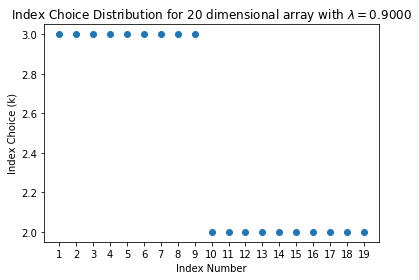

In [30]:
# Check the index distribution of the TMSS --> Bell state conversion for several lambda

import matplotlib.pyplot as plt

r = atanh(0.9) #lambda = tanh(r), in this case lamb>=0.71 (r>=0.88) for majorization condition
N = 20 #dimension
pseudoTMSND = generateTMSSvector(r, N, renormalize=False)
BellN_1 = generateBellstate_reduced(N+1)  #generate one larger than pseudoTMSND so that the last k-index is found (artefact of the code)
tparamsN, indicesN = t_parameters(pseudoTMSND,BellN_1, checkMajorization=False, checkLength=False)
print('pseudoTMSND->Bell t parameters:', tparamsN, '\n') 
print('pseudoTMSND->Bell: Index choice:',indicesN)


# Check which type of index choice it is (k=2 or k=3, or neither), and print:
k2_idx_list = [2]*(N-1)
k2_idx_list[0] = 3
k3_idx_list = [3]*(N-1)
if (indicesN==k2_idx_list):
  print('LIST TYPE: k=2')
if (indicesN==k3_idx_list):
  print('LIST TYPE: k=3')
else:
  print('LIST TYPE: Neither k=2 nor k=3 type')


# Plot
idx_array = [i for i in range(1,len(indicesN)+1)] #generate an indices number array (index 1, index 2, ..., index N)
plt.scatter(idx_array, indicesN)
plt.xticks(idx_array)
plt.title('Index Choice Distribution for '+ str(N)+ r' dimensional array with $\lambda = $'+ str(format(tanh(r),'0.4f')))
plt.xlabel('Index Number')
plt.ylabel('Index Choice (k)')
plt.plot()


In [8]:
sum_arr_till_index(pseudoTMSND,N)
r

1.2933446720489712

In [9]:
# Function: Do N T-transformations 

In [10]:
(1-2*(0.8408)**4)/(2*(1-(0.8408)**2))

0.0007823640395807579

In [11]:
(0.8408)**4 * (1-(0.8408)**2)

0.1464604894465278

In [12]:
(0.8408)**4 - (0.8408)**2 +1/2

0.2928260840247296

In [13]:
a = 2**(-1/4)
(a)**8 -(a)**4 +(a)**2 -0.5
(a)**10 -(a)**8 -a**6 + a**4 -(a)**2 +0.5
(a)**4 -(a)**2 +0.5

0.2928932188134524

In [14]:
a

0.8408964152537145

In [15]:
# Check alternate summation formula:

lamb = .8
n = 1502
N = n-2
accum = 1 #accumulator for summation, starts from 1

for j in range(1,N+1):
  accum += (-1/(lamb**2))**j
  # print(accum)

accum_sum = (1-(-1/lamb**2)**(n-2))/(1+lamb**(-2))  #summation formula
print('accum', accum)
print('accum_sum', accum_sum)
accum == accum_sum  #check if true
print((lamb**2)/(-1+lamb**(-2)))

accum 3.274878379999672e+290
accum_sum -2.0959221631997902e+290
1.1377777777777784


In [16]:
Llamb = 0.86
print(1-Llamb**2)
print((Llamb**2)*(1-Llamb**2))
print((Llamb**4)*(1-Llamb**2))
print((Llamb**6)*(1-Llamb**2))

0.2604000000000001
0.19259184000000004
0.14244092486400003
0.10534930802941442


In [17]:
print(0.5*(1-2*(1-Llamb**2)))
print(0.5*(1-2*(Llamb**2)*(1-Llamb**2)))

0.23959999999999992
0.30740815999999993


In [18]:
.1424/.2396

0.5943238731218697

In [19]:
(1-0.5943238731218697)*.2396

0.09720000000000001

In [27]:
LABELS = [i for i in range(1,100+1)]
# plt.xticks(LABELS)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]